In [5]:
#FCFS
import random

NUM_PROCESSES = 83
MAX_TRANSIENT_EVENTS = 8

class Process:
    def __init__(self, name, burst_time):
        self.name = name
        self.burst_time = burst_time
        self.waiting_time = 0
        self.turnaround_time = 0

def main():
    processes = generate_processes()
    introduce_transient_events(processes)
    calculate_times(processes)
    print_results(processes)

def generate_processes():
    processes = []
    for i in range(NUM_PROCESSES):
        processes.append(Process(f"P{i + 1}", (i % 10) + 1))
    return processes

def introduce_transient_events(processes):
    num_transient_events = random.randint(1, MAX_TRANSIENT_EVENTS)
    print(f"\nNumber of transient events: {num_transient_events}")
    for _ in range(num_transient_events):
        process_index = random.randint(0, NUM_PROCESSES - 1)
        adjustment = random.randint(1, 5)
        processes[process_index].burst_time += adjustment
        print(f"Transient event: Process {processes[process_index].name} burst time increased by {adjustment} units")

def calculate_times(processes):
    current_time = 0
    for process in processes:
        process.waiting_time = current_time
        current_time += process.burst_time
        process.turnaround_time = current_time

def print_results(processes):
    print("\nProcess\tBurst Time\tWaiting Time\tTurnaround Time")
    total_waiting_time = 0
    total_turnaround_time = 0
    for process in processes:
        print(f"{process.name}\t\t{process.burst_time}\t\t\t{process.waiting_time}\t\t\t\t{process.turnaround_time}")
        total_waiting_time += process.waiting_time
        total_turnaround_time += process.turnaround_time
    avg_waiting_time = total_waiting_time / NUM_PROCESSES
    avg_turnaround_time = total_turnaround_time / NUM_PROCESSES
    print(f"\nAverage waiting time = {avg_waiting_time:.2f}")
    print(f"Average turnaround time = {avg_turnaround_time:.2f}")

if __name__ == "__main__":
    main()



Number of transient events: 7
Transient event: Process P10 burst time increased by 1 units
Transient event: Process P62 burst time increased by 2 units
Transient event: Process P47 burst time increased by 2 units
Transient event: Process P38 burst time increased by 3 units
Transient event: Process P62 burst time increased by 1 units
Transient event: Process P79 burst time increased by 2 units
Transient event: Process P16 burst time increased by 1 units

Process	Burst Time	Waiting Time	Turnaround Time
P1		1			0				1
P2		2			1				3
P3		3			3				6
P4		4			6				10
P5		5			10				15
P6		6			15				21
P7		7			21				28
P8		8			28				36
P9		9			36				45
P10		11			45				56
P11		1			56				57
P12		2			57				59
P13		3			59				62
P14		4			62				66
P15		5			66				71
P16		7			71				78
P17		7			78				85
P18		8			85				93
P19		9			93				102
P20		10			102				112
P21		1			112				113
P22		2			113				115
P23		3			115				118
P24		4			118				122
P25		5			122				127
P26		6			127				133
P27		7			133				140
P28	

In [8]:
#priority
import random

class Process:
    def __init__(self, name, burst_time, priority):
        self.name = name
        self.burst_time = burst_time
        self.priority = priority

def priority_scheduling(processes):
    processes.sort(key=lambda p: p.priority)
    waiting_time = 0
    total_waiting_time = 0
    current_time = 0
    turnaround_time = 0
    total_turnaround_time = 0

    print("Process\tBurst Time\tPriority\tWaiting Time\tTurnaround Time")

    for process in processes:
        waiting_time = current_time
        total_waiting_time += waiting_time
        turnaround_time = waiting_time + process.burst_time
        total_turnaround_time += turnaround_time
        current_time += process.burst_time

        print(f"{process.name}\t\t{process.burst_time}\t\t\t{process.priority}\t\t\t\t{waiting_time}\t\t\t{turnaround_time}")

    print(f"\nAverage waiting time = {total_waiting_time / len(processes):.2f}")
    print(f"Average turnaround time = {total_turnaround_time / len(processes):.2f}")

def main():
    processes = [Process(f"P{i+1}", random.randint(1, 10), random.randint(1, 10)) for i in range(83)]

    num_transient_events = random.randint(1, 10)
    print(f"Number of transient events: {num_transient_events}")
    for _ in range(num_transient_events):
        process_index = random.randint(0, len(processes) - 1)
        adjustment = random.randint(1, 5)
        processes[process_index].priority += adjustment
        print(f"Transient event: Process {processes[process_index].name} priority adjusted by {adjustment} units")

    priority_scheduling(processes)

if __name__ == "__main__":
    main()


Number of transient events: 8
Transient event: Process P46 priority adjusted by 2 units
Transient event: Process P17 priority adjusted by 1 units
Transient event: Process P13 priority adjusted by 2 units
Transient event: Process P18 priority adjusted by 5 units
Transient event: Process P23 priority adjusted by 3 units
Transient event: Process P51 priority adjusted by 3 units
Transient event: Process P10 priority adjusted by 1 units
Transient event: Process P71 priority adjusted by 5 units
Process	Burst Time	Priority	Waiting Time	Turnaround Time
P11		10			1				0			10
P40		1			1				10			11
P53		3			1				11			14
P8		9			2				14			23
P14		9			2				23			32
P16		7			2				32			39
P21		2			2				39			41
P43		7			2				41			48
P56		1			2				48			49
P59		3			2				49			52
P65		8			2				52			60
P66		2			2				60			62
P67		2			2				62			64
P75		8			2				64			72
P77		2			2				72			74
P80		3			2				74			77
P7		9			3				77			86
P30		5			3				86			91
P32		8			3				91			99
P41		8			3				99			107
P47		4			3

In [10]:
#round robin
import random
from collections import deque

class Process:
    def __init__(self, name, burst_time):
        self.name = name
        self.burst_time = burst_time
        self.remaining_time = burst_time

def round_robin_scheduling():
    NUM_PROCESSES = 83
    TIME_QUANTUM = 2
    MAX_TRANSIENT_EVENTS = 10

    process_queue = deque([Process(f"P{i + 1}", (i % 10) + 1) for i in range(NUM_PROCESSES)])
    random.seed()

    num_transient_events = random.randint(1, MAX_TRANSIENT_EVENTS)
    print(f"Number of transient events: {num_transient_events}")
    for _ in range(num_transient_events):
        index = random.randint(0, NUM_PROCESSES - 1)
        adjustment = random.randint(1, 5)
        transient_process = process_queue[index]
        transient_process.burst_time += adjustment
        transient_process.remaining_time += adjustment
        print(f"Transient event: Process {transient_process.name} burst time adjusted by {adjustment} units")

    process_queue = deque(list(process_queue))

    current_time = 0
    waiting_times = [0] * NUM_PROCESSES
    turnaround_times = [0] * NUM_PROCESSES
    processed_count = 0

    process_index_map = {p.name: i for i, p in enumerate(process_queue)}

    while process_queue:
        process = process_queue.popleft()
        time_to_run = min(process.remaining_time, TIME_QUANTUM)
        process.remaining_time -= time_to_run
        current_time += time_to_run

        if process.remaining_time > 0:
            process_queue.append(process)
        else:
            process_index = process_index_map[process.name]
            waiting_times[process_index] = current_time - process.burst_time
            turnaround_times[process_index] = waiting_times[process_index] + process.burst_time
            processed_count += 1

    print("\nProcess\tBurst Time\tWaiting Time\tTurnaround Time")
    for i in range(NUM_PROCESSES):
        burst_time = waiting_times[i] + turnaround_times[i] - waiting_times[i]
        print(f"P{i+1}\t\t{burst_time}\t\t\t\t{waiting_times[i]}\t\t\t{turnaround_times[i]}")

    total_waiting_time = sum(waiting_times)
    total_turnaround_time = sum(turnaround_times)

    print(f"\nAverage waiting time = {total_waiting_time / NUM_PROCESSES:.2f}")
    print(f"Average turnaround time = {total_turnaround_time / NUM_PROCESSES:.2f}")

if __name__ == "__main__":
    round_robin_scheduling()


Number of transient events: 1
Transient event: Process P4 burst time adjusted by 1 units

Process	Burst Time	Waiting Time	Turnaround Time
P1		1				0			1
P2		3				1			3
P3		158				155			158
P4		279				274			279
P5		280				275			280
P6		282				276			282
P7		368				361			368
P8		370				362			370
P9		424				415			424
P10		426				416			426
P11		20				19			20
P12		22				20			22
P13		173				170			173
P14		175				171			175
P15		291				286			291
P16		293				287			293
P17		375				368			375
P18		377				369			377
P19		427				418			427
P20		429				419			429
P21		39				38			39
P22		41				39			41
P23		188				185			188
P24		190				186			190
P25		302				297			302
P26		304				298			304
P27		382				375			382
P28		384				376			384
P29		430				421			430
P30		432				422			432
P31		58				57			58
P32		60				58			60
P33		203				200			203
P34		205				201			205
P35		313				308			313
P36		315				309			315
P37		389				382			389
P38		391				383			391
P39		433				424			433
P40		435				425			435
P41		77				76			77
P4

In [14]:
#Sjf
import random
import heapq

class Process:
    def __init__(self, name, burst_time):
        self.name = name
        self.burst_time = burst_time

    def __lt__(self, other):
        return self.burst_time < other.burst_time

def generate_processes(count):
    return [Process(f"P{i + 1}", random.randint(1, 10)) for i in range(count)]

def sjf_scheduling(processes, transient_event_time):
    process_queue = []
    for process in processes:
        heapq.heappush(process_queue, process)

    current_time = 0
    total_waiting_time = 0
    total_turnaround_time = 0
    transient_event_occurred = False

    output = "Process\tBurst Time\tWaiting Time\tTurnaround Time\n"

    while process_queue:
        process = heapq.heappop(process_queue)

        if current_time >= transient_event_time and not transient_event_occurred:
            process.burst_time += 3
            output += f"Transient event: Process {process.name} burst time adjusted by +3 units at time {current_time}\n"
            transient_event_occurred = True
            heapq.heappush(process_queue, process)
            continue

        waiting_time = current_time
        turnaround_time = waiting_time + process.burst_time

        total_waiting_time += waiting_time
        total_turnaround_time += turnaround_time
        current_time += process.burst_time

        output += f"{process.name}\t\t{process.burst_time}\t\t\t{waiting_time}\t\t\t\t{turnaround_time}\n"

    print(output)
    print(f"\nAverage waiting time = {total_waiting_time / len(processes):.2f}")
    print(f"Average turnaround time = {total_turnaround_time / len(processes):.2f}")

if __name__ == "__main__":
    num_processes = 83
    transient_event_time = 5
    random.seed()
    processes = generate_processes(num_processes)
    sjf_scheduling(processes, transient_event_time)


Process	Burst Time	Waiting Time	Turnaround Time
P12		1			0				1
P14		1			1				2
P63		1			2				3
P48		1			3				4
P36		1			4				5
Transient event: Process P82 burst time adjusted by +3 units at time 5
P37		1			5				6
P77		1			6				7
P66		1			7				8
P69		1			8				9
P71		1			9				10
P5		2			10				12
P23		2			12				14
P43		2			14				16
P20		2			16				18
P76		2			18				20
P61		3			20				23
P54		3			23				26
P47		3			26				29
P83		3			29				32
P70		3			32				35
P68		3			35				38
P57		4			38				42
P27		4			42				46
P53		4			46				50
P7		4			50				54
P50		4			54				58
P24		4			58				62
P9		4			62				66
P22		4			66				70
P44		4			70				74
P11		4			74				78
P42		4			78				82
P82		4			82				86
P33		4			86				90
P74		4			90				94
P72		4			94				98
P65		4			98				102
P3		5			102				107
P8		5			107				112
P55		5			112				117
P25		5			117				122
P73		5			122				127
P67		5			127				132
P78		5			132				137
P1		5			137				142
P15		6			142				148
P59		6			148				154
P21		6			154				160
P79		6			160				166

In [16]:
#srtf
import random

class Process:
    def __init__(self, id, arrival_time, burst_time):
        self.id = id
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time

def srtf_scheduling(processes):
    processes.sort(key=lambda p: p.arrival_time)
    n = len(processes)
    complete = 0
    current_time = 0
    min_remaining_time = float('inf')
    shortest = -1
    waiting_times = [0] * n
    turnaround_times = [0] * n

    transient_event_time = 5
    transient_event_occurred = False

    while complete != n:
        for j in range(n):
            if (processes[j].arrival_time <= current_time and
                    processes[j].remaining_time < min_remaining_time and
                    processes[j].remaining_time > 0):
                min_remaining_time = processes[j].remaining_time
                shortest = j

        if shortest == -1:
            current_time += 1
            continue

        if current_time == transient_event_time and not transient_event_occurred:
            processes[shortest].remaining_time += 3
            print(f"Transient event: Process P{processes[shortest].id + 1} remaining time adjusted by +3 units at time {current_time}")
            transient_event_occurred = True

        processes[shortest].remaining_time -= 1
        min_remaining_time = processes[shortest].remaining_time

        if min_remaining_time == 0:
            min_remaining_time = float('inf')

        if processes[shortest].remaining_time == 0:
            complete += 1
            finish_time = current_time + 1
            waiting_times[shortest] = finish_time - processes[shortest].burst_time - processes[shortest].arrival_time

            if waiting_times[shortest] < 0:
                waiting_times[shortest] = 0

        current_time += 1

    for i in range(n):
        turnaround_times[i] = processes[i].burst_time + waiting_times[i]

    print("Process\tBurst Time\tArrival Time\tWaiting Time\tTurnaround Time")
    for i in range(n):
        print(f"P{processes[i].id + 1}\t\t\t{processes[i].burst_time}\t\t\t{processes[i].arrival_time}\t\t\t{waiting_times[i]}\t\t\t\t{turnaround_times[i]}")

    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n

    print(f"\nAverage waiting time = {avg_waiting_time:.2f}")
    print(f"Average turnaround time = {avg_turnaround_time:.2f}")

if __name__ == "__main__":
    processes = []
    random.seed(0)

    for i in range(83):
        arrival_time = random.randint(0, 10)
        burst_time = random.randint(1, 10)
        processes.append(Process(i, arrival_time, burst_time))

    srtf_scheduling(processes)


Transient event: Process P20 remaining time adjusted by +3 units at time 5
Process	Burst Time	Arrival Time	Waiting Time	Turnaround Time
P2			5			0			91				96
P45			10			0			356				366
P63			5			0			96				101
P67			2			0			0				2
P69			10			0			366				376
P72			2			0			6				8
P9			10			1			375				385
P13			6			1			125				131
P15			6			1			131				137
P22			7			1			185				192
P31			6			1			137				143
P33			5			1			100				105
P35			9			1			283				292
P40			10			1			385				395
P48			3			1			23				26
P50			9			1			292				301
P58			6			1			143				149
P64			4			1			50				54
P75			7			1			192				199
P76			6			1			149				155
P77			1			1			1				2
P80			8			1			227				235
P29			9			2			300				309
P49			1			2			1				2
P68			4			2			53				57
P27			10			3			393				403
P28			4			3			56				60
P37			10			3			403				413
P44			3			3			24				27
P54			10			3			413				423
P62			4			3			60				64
P79			3			3			27				30
P81			1			3			1				2
P8			3			4			29				32
P10			9			4			307				316
P12			2			4			8				10
P2

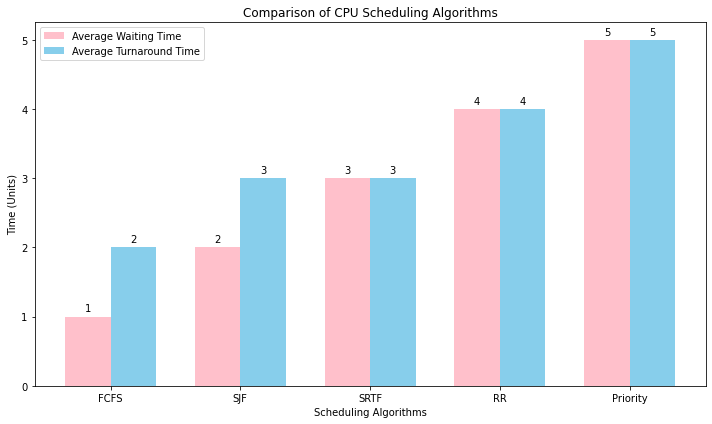

In [21]:
import matplotlib.pyplot as plt
import numpy as np


algorithms = ['FCFS', 'SJF', 'SRTF', 'RR', 'Priority']
avg_waiting_times = [1, 2, 3, 4, 5]  
avg_turnaround_times = [2, 3, 3, 4, 5] 


x = np.arange(len(algorithms)) 
width = 0.35  


fig, ax = plt.subplots(figsize=(10, 6))


bars1 = ax.bar(x - width/2, avg_waiting_times, width, label='Average Waiting Time', color='pink')
bars2 = ax.bar(x + width/2, avg_turnaround_times, width, label='Average Turnaround Time', color='skyblue')


ax.set_xlabel('Scheduling Algorithms')
ax.set_ylabel('Time (Units)')
ax.set_title('Comparison of CPU Scheduling Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()


for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(round(height, 1)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom')


plt.tight_layout()
plt.show()
